## Install and import the required libraries 

In [ ]:
# pip install yfinance 

# yfinance is a python library which retrieves real time market value

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters
import yfinance as yf

register_matplotlib_converters()

warnings.filterwarnings("ignore")

## Loading Bitcoin value (BTC-USD)

In [23]:
btc = yf.Ticker("BTC-USD")

# get stock info
print(btc.info)

# get historical market data
hist = btc.history(period="5d", interval = "1m")



{'companyOfficers': [], 'name': 'Bitcoin', 'startDate': 1367107200, 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,721,987. The last known price of Bitcoin is 35,387.50455597 USD and is up 1.53 over the last 24 hours. It is currently trading on 9728 active market(s) with $42,723,213,076.31 traded over the last 24 hours. More information can be found at https://bitcoin.org/.', 'maxAge': 1, 'previousClose': 35508.32, 'regularMarketOpen': 35508.32, 'twoHundredDayAverage': 40968.258, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': 31203702784, 'regularMarketDayHigh': 35843.113, 'navPrice': None, 'averageDailyVolume10Day': 62474051689, 'totalAssets': None, 'regularMarketPreviousClose': 35508.32, 'fiftyDayAverage': 51164.438, 'trailingAnnualDividendRate': None, 'open': 35508.32, 'toCurrency': 'USD=X', 'averageVolume10days': 62474051689, 'expireDate': None, 'yield': No

In [24]:
df = hist.reset_index()

In [25]:
df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-05-27 00:00:00+01:00,39019.730469,39019.730469,39019.730469,39019.730469,0,0,0
1,2021-05-27 00:01:00+01:00,38978.664062,38978.664062,38978.664062,38978.664062,0,0,0
2,2021-05-27 00:02:00+01:00,38937.027344,38937.027344,38937.027344,38937.027344,0,0,0
3,2021-05-27 00:03:00+01:00,38897.214844,38897.214844,38897.214844,38897.214844,0,0,0
4,2021-05-27 00:04:00+01:00,38783.230469,38783.230469,38783.230469,38783.230469,0,0,0
...,...,...,...,...,...,...,...,...
5703,2021-05-31 01:27:00+01:00,35411.726562,35411.726562,35411.726562,35411.726562,1034240,0,0
5704,2021-05-31 01:28:00+01:00,35395.953125,35395.953125,35395.953125,35395.953125,24614912,0,0
5705,2021-05-31 01:29:00+01:00,35413.839844,35413.839844,35413.839844,35413.839844,0,0,0
5706,2021-05-31 01:30:00+01:00,35471.152344,35471.152344,35471.152344,35471.152344,10729472,0,0


## Data Preprocessing 

In [26]:
# feature creation for better representation of price on a day
df['Mean'] = (df['Low'] + df['High'])/2

In [27]:
# remove NaNs and Nones
df = df.dropna()
df=df.drop(columns=['Dividends','Stock Splits'])


In [28]:
# data preview
print(df.head())

                   Datetime          Open          High           Low  \
0 2021-05-27 00:00:00+01:00  39019.730469  39019.730469  39019.730469   
1 2021-05-27 00:01:00+01:00  38978.664062  38978.664062  38978.664062   
2 2021-05-27 00:02:00+01:00  38937.027344  38937.027344  38937.027344   
3 2021-05-27 00:03:00+01:00  38897.214844  38897.214844  38897.214844   
4 2021-05-27 00:04:00+01:00  38783.230469  38783.230469  38783.230469   

          Close  Volume          Mean  
0  39019.730469       0  39019.730469  
1  38978.664062       0  38978.664062  
2  38937.027344       0  38937.027344  
3  38897.214844       0  38897.214844  
4  38783.230469       0  38783.230469  


In [29]:
# making copy for making changes
dataset_for_prediction = df.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['Mean'].shift()
dataset_for_prediction=dataset_for_prediction.dropna()
dataset_for_prediction['Datetime'] =pd.to_datetime(dataset_for_prediction['Datetime'])
dataset_for_prediction.index= dataset_for_prediction['Datetime']

In [30]:
dataset_for_prediction

,Datetime,Open,High,Low,Close,Volume,Mean,Actual
Datetime,,,,,,,,
2021-05-27 00:01:00+01:00,2021-05-27 00:01:00+01:00,38978.664062,38978.664062,38978.664062,38978.664062,0,38978.664062,39019.730469
2021-05-27 00:02:00+01:00,2021-05-27 00:02:00+01:00,38937.027344,38937.027344,38937.027344,38937.027344,0,38937.027344,38978.664062
2021-05-27 00:03:00+01:00,2021-05-27 00:03:00+01:00,38897.214844,38897.214844,38897.214844,38897.214844,0,38897.214844,38937.027344
2021-05-27 00:04:00+01:00,2021-05-27 00:04:00+01:00,38783.230469,38783.230469,38783.230469,38783.230469,0,38783.230469,38897.214844
2021-05-27 00:05:00+01:00,2021-05-27 00:05:00+01:00,38805.593750,38805.593750,38805.593750,38805.593750,0,38805.593750,38783.230469
...,...,...,...,...,...,...,...,...
2021-05-31 01:27:00+01:00,2021-05-31 01:27:00+01:00,35411.726562,35411.726562,35411.726562,35411.726562,1034240,35411.726562,35396.871094
2021-05-31 01:28:00+01:00,2021-05-31 01:28:00+01:00,35395.953125,35395.953125,35395.953125,35395.953125,24614912,35395.953125,35411.726562
2021-05-31 01:29:00+01:00,2021-05-31 01:29:00+01:00,35413.839844,35413.839844,35413.839844,35413.839844,0,35413.839844,35395.953125


In [31]:
# normalizing exogeneous variables
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['Open', 'High', 'Low', 'Close', 'Volume', 'Mean']])
scaled_input = pd.DataFrame(scaled_input, index=dataset_for_prediction.index)
X= scaled_input
X.rename(columns={0:'Open', 1:'High', 2:'Low', 3:'Close', 4:'Volume', 5:'Mean'}, inplace=True)
print(X.head())

                               Open      High       Low     Close  Volume  \
Datetime                                                                    
2021-05-27 00:01:00+01:00  0.795746  0.795746  0.795746  0.795746     0.0   
2021-05-27 00:02:00+01:00  0.789676  0.789676  0.789676  0.789676     0.0   
2021-05-27 00:03:00+01:00  0.783871  0.783871  0.783871  0.783871     0.0   
2021-05-27 00:04:00+01:00  0.767253  0.767253  0.767253  0.767253     0.0   
2021-05-27 00:05:00+01:00  0.770513  0.770513  0.770513  0.770513     0.0   

                               Mean  
Datetime                             
2021-05-27 00:01:00+01:00  0.795746  
2021-05-27 00:02:00+01:00  0.789676  
2021-05-27 00:03:00+01:00  0.783871  
2021-05-27 00:04:00+01:00  0.767253  
2021-05-27 00:05:00+01:00  0.770513  


In [32]:
# normalizing the time series
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output, index=dataset_for_prediction.index)
y=scaler_output
y.rename(columns={0:'BTC Price 30 min'}, inplace= True)
y.index=dataset_for_prediction.index
print("Normalized y")
print(y.head())

Normalized y
                           BTC Price 30 min
Datetime                                   
2021-05-27 00:01:00+01:00          0.801733
2021-05-27 00:02:00+01:00          0.795746
2021-05-27 00:03:00+01:00          0.789676
2021-05-27 00:04:00+01:00          0.783871
2021-05-27 00:05:00+01:00          0.767253


In [33]:
dataset_for_prediction

,Datetime,Open,High,Low,Close,Volume,Mean,Actual
Datetime,,,,,,,,
2021-05-27 00:01:00+01:00,2021-05-27 00:01:00+01:00,38978.664062,38978.664062,38978.664062,38978.664062,0,38978.664062,39019.730469
2021-05-27 00:02:00+01:00,2021-05-27 00:02:00+01:00,38937.027344,38937.027344,38937.027344,38937.027344,0,38937.027344,38978.664062
2021-05-27 00:03:00+01:00,2021-05-27 00:03:00+01:00,38897.214844,38897.214844,38897.214844,38897.214844,0,38897.214844,38937.027344
2021-05-27 00:04:00+01:00,2021-05-27 00:04:00+01:00,38783.230469,38783.230469,38783.230469,38783.230469,0,38783.230469,38897.214844
2021-05-27 00:05:00+01:00,2021-05-27 00:05:00+01:00,38805.593750,38805.593750,38805.593750,38805.593750,0,38805.593750,38783.230469
...,...,...,...,...,...,...,...,...
2021-05-31 01:27:00+01:00,2021-05-31 01:27:00+01:00,35411.726562,35411.726562,35411.726562,35411.726562,1034240,35411.726562,35396.871094
2021-05-31 01:28:00+01:00,2021-05-31 01:28:00+01:00,35395.953125,35395.953125,35395.953125,35395.953125,24614912,35395.953125,35411.726562
2021-05-31 01:29:00+01:00,2021-05-31 01:29:00+01:00,35413.839844,35413.839844,35413.839844,35413.839844,0,35413.839844,35395.953125


In [34]:
# train-test split (cannot shuffle in case of time series)
train_size=int(len(df) *0.8)
test_size = int(len(df)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()


In [35]:
train_X

,Open,High,Low,Close,Volume,Mean
Datetime,,,,,,
2021-05-27 00:01:00+01:00,0.795746,0.795746,0.795746,0.795746,0.000000,0.795746
2021-05-27 00:02:00+01:00,0.789676,0.789676,0.789676,0.789676,0.000000,0.789676
2021-05-27 00:03:00+01:00,0.783871,0.783871,0.783871,0.783871,0.000000,0.783871
2021-05-27 00:04:00+01:00,0.767253,0.767253,0.767253,0.767253,0.000000,0.767253
2021-05-27 00:05:00+01:00,0.770513,0.770513,0.770513,0.770513,0.000000,0.770513
...,...,...,...,...,...,...
2021-05-30 06:15:00+01:00,0.218193,0.218193,0.218193,0.218193,0.000000,0.218193
2021-05-30 06:16:00+01:00,0.221916,0.221916,0.221916,0.221916,0.000000,0.221916
2021-05-30 06:17:00+01:00,0.232315,0.232315,0.232315,0.232315,0.000000,0.232315


## ARIMA Model

In [36]:
# Init the best ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(
    train_y,
    exog=train_X,
    order=(0,1,1)
)

# training the model
results = model.fit()

# get predictions
predictions = results.predict(start =train_size, end=train_size+test_size-2,exog=test_X)

In [37]:
# setting up for plots
act = pd.DataFrame(scaler_output.iloc[train_size:, 0])
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['BTC Price 30 min']
predictions.rename(columns={0:'Pred', 'predicted_mean':'Pred'}, inplace=True)

In [38]:
# post-processing inverting normalization
testPredict = sc_out.inverse_transform(predictions[['Pred']])
testActual = sc_out.inverse_transform(predictions[['Actual']])

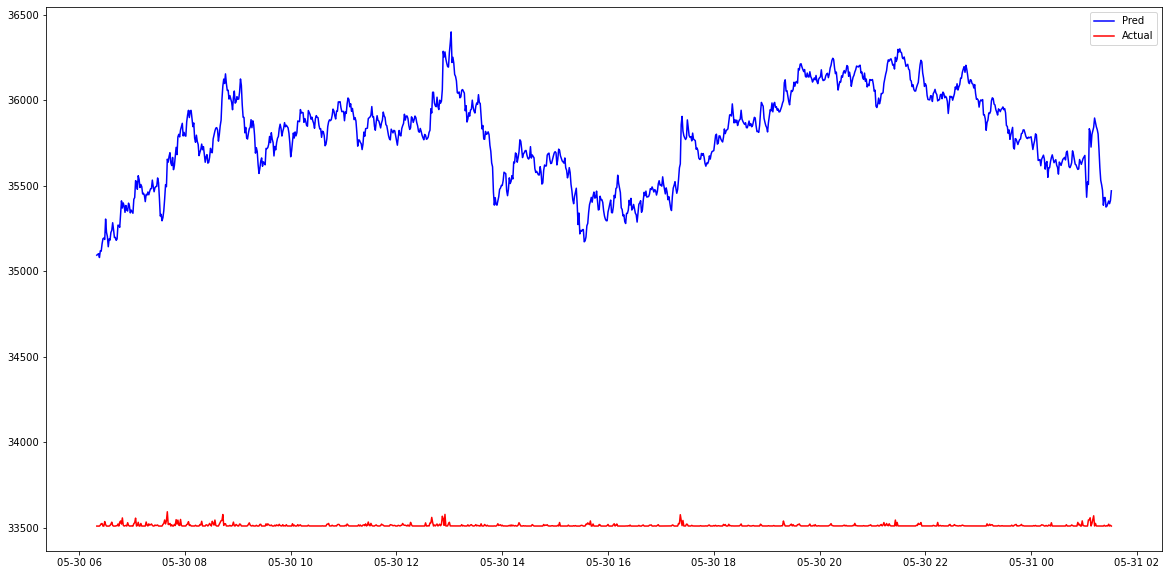

In [39]:
# prediction plots
plt.figure(figsize=(20,10))
plt.plot(predictions.index, testActual, label='Pred', color='blue')
plt.plot(predictions.index, testPredict, label='Actual', color='red')
plt.legend()
plt.show()

In [40]:
testScore = np.sqrt(mean_squared_error(testActual, testPredict))
print ('Test Score {} RMSE'.format(testScore))

Test Score 2291.115202881652 RMSE
